In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
hr=pd.read_csv('F:jupyter\hr_analysis.csv')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [5]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<BarContainer object of 3 artists>

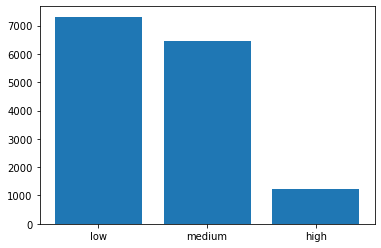

In [6]:
plt.bar(list(hr['salary'].value_counts().keys()),list(hr['salary'].value_counts()))

In [7]:
left=hr[hr['left']==1]
left.shape

(3571, 10)

In [8]:
retained=hr[hr['left']==0]

In [9]:
g=hr.groupby('left')

In [10]:
g.mean()*100

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,66.680959,71.547340,378.666433,19906.020301,338.003150,17.500875,2.625131
1,44.009801,71.811257,385.550266,20741.921031,387.650518,4.732568,0.532064


<AxesSubplot:xlabel='salary'>

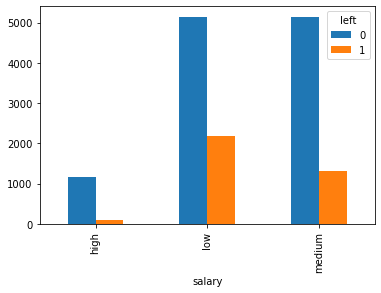

In [11]:
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

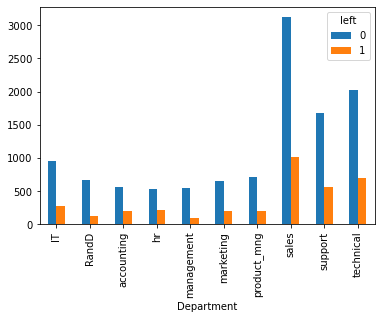

In [12]:
pd.crosstab(hr.Department,hr.left).plot(kind='bar')

In [13]:
subdf = hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [14]:
salary_dummies = pd.get_dummies(subdf.salary,prefix='salary')

In [15]:
hr_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [16]:
hr_with_dummies.drop('salary',axis='columns',inplace=True)


In [17]:
#we are making the model
x=hr_with_dummies
y=hr.left

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log=LogisticRegression()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [21]:
log.fit(x_train,y_train)

LogisticRegression()

In [23]:
log.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
log.score(x_train,y_train)

In [36]:
hr[hr.loc[:,'number_project']==3].value_counts()


Series([], dtype: int64)

<BarContainer object of 6 artists>

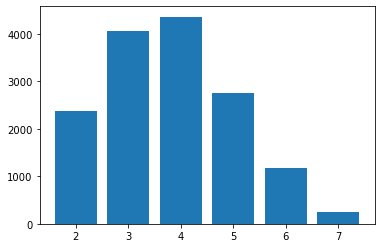

In [37]:
plt.bar(list(hr['number_project'].value_counts().keys()),list(hr['number_project'].value_counts()))